<a href="https://colab.research.google.com/github/ZackPashkin/ocr_pytorch/blob/main/data_visualization_%2B_vs_code_github_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SSH connection to google colab GPU instance

In [ ]:
#@title Mount permanent storage
def mount_storage():
  from google.colab import auth
  import os
  auth.authenticate_user()
  !echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
  !curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
  !apt -qq update
  !apt -qq install gcsfuse
  os.makedirs("handwritten_rus",exist_ok=True)
  # bucket name only name without prefix gs:// 
  #for example if bucket name is gs://helloworld then 
  !gcsfuse handwritten_rus handwritten_rus
  #now you should be able to read/write to dir_name as for usual folder
  print("mounted to /content/mounted_storage")
mount_storage()

!ls /content/handwritten_rus

!touch /content/handwritten_rus/test.txt

In [ ]:
#@title Setup tunnel for ssh from vscode 

#1 - setup ssh/user 


#Generate a random root password
import random, string
password = ''.join(random.choice(string.ascii_letters + string.digits) for i in range(30))


#Setup sshd
! apt-get install -qq -o=Dpkg::Use-Pty=0 openssh-server pwgen > /dev/null

#Set root password
! echo root:$password | chpasswd
! mkdir -p /var/run/sshd
! echo "PermitRootLogin yes" >> /etc/ssh/sshd_config
! echo "PasswordAuthentication yes" >> /etc/ssh/sshd_config

print("username: root")
print("password: ", password)

#Run sshd
get_ipython().system_raw('/usr/sbin/sshd -D &')



! wget -q -c -nc https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip -qq -n ngrok-stable-linux-amd64.zip

# 3 - setup Ngrok - authtoken

#Ask token
print("Get your authtoken from https://dashboard.ngrok.com/auth")
import getpass
authtoken = getpass.getpass()

#Create tunnel
get_ipython().system_raw('./ngrok authtoken $authtoken && ./ngrok tcp 22 &')
print('https://dashboard.ngrok.com/status/tunnels')

In [ ]:
#@title Format link for ssh connection

# copy from here https://dashboard.ngrok.com/status/tunnels
#tcp://2.tcp.ngrok.io:10147

#vscode remote ssh format:
#root@2.tcp.ngrok.io:17892
#enter password from above

# format tunnel link for vscode
TUNNEL_LINK = input("Input link from https://dashboard.ngrok.com/status/tunnels: ")
TUNNEL_LINK = TUNNEL_LINK.replace('tcp://', 'root@')
print(TUNNEL_LINK)
print("password: ", password)
print('\x1b[6;30;42m' + f"Open Remote SSH: Connect to host in vscode \n\n and pass {TUNNEL_LINK}"  + '\x1b[0m')
print('\x1b[6;30;42m' + f"Then press continue and enter password {password}"  + '\x1b[0m')

In [ ]:
# enable nvidia-smi
export LD_PRELOAD=/usr/lib64-nvidia/libnvidia-ml.so
nvidia-smi

In [ ]:
# create project on github and clone
# configure git
~/ocr_pytorch# git config --global user.email xxx@gmail.com
~/ocr_pytorch# git config --global user.name "xxx"

In [ ]:
# add extentions for vscode
# tabnine
# Press Cmd+P in your Visual Studio Code, paste the following command, and press Enter.
# ext install TabNine.tabnine-vscode
# add python interpreter

In [ ]:
#to prevent colab shutdown
import time 
time.sleep(1000000000)

# Visualize data

In [ ]:
#@title
import sys
sys.path.append("/content/ocr_pytorch/src")
from config import *
from dataset import *
from train import *
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#@title

(
    train_img,
    test_img, 
    train_labels, 
    test_labels, 
    train_orig_labels, 
    test_orig_targets,
)   =model_selection.train_test_split(
        IMAGES, LABELS_ENCODED, LABELS_NAMES, test_size=0.1, random_state=2020)

train_dataset = OcrDataset(image_path=train_img, 
                            labels=train_labels, 
                            resize=(IMAGE_HEIGHT,IMAGE_WIDTH)
                          )

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=True
)


test_dataset = OcrDataset(image_path=test_img, 
                            labels=test_labels, 
                            resize=(IMAGE_HEIGHT,IMAGE_WIDTH)
                          )

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=False
)
    

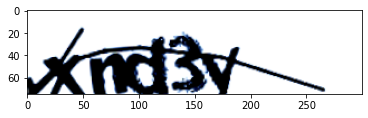

In [ ]:
#@title
np_img = train_dataset[80]["images"].numpy()
np_img  = np.transpose(np_img, (1,2,0))
plt.imshow(np_img)

In [ ]:
#@title
